In [174]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [175]:
data = pd.read_csv("nominal_data_dengue_2010.csv")
data

,OBJECTID,Join_Count,TARGET_FID,ID_HILLO,ID_SON,ANYO,FOLIO,SEXO,EDAD,D_H_,...,GRADO_MARG,GRADO_MA_1,hectarea,DENSI_POB,VIV2,INDEX_NORM,INDEX_NO_1,x,y,Unnamed: 69
0,1,1,217,231,6261,0,61,hombre,35,PRIVADO,...,Bajo,2,36.071365,113.109116,1088,0.754160,0.245840,-110.958961,29.129075,NaN
1,3,1,219,233,6425,0,296,hombre,14,ISSSTESON,...,Muy bajo,1,42.133331,99.731018,1125,0.768429,0.231571,-110.965989,29.131731,NaN
2,2,1,218,232,6424,0,295,mujer,38,ISSSTESON,...,Muy bajo,1,42.133331,99.731018,1125,0.768429,0.231571,-110.965989,29.131733,NaN
3,4,1,220,234,6497,0,427,mujer,22,ISSSTESON,...,Muy bajo,1,61.364513,111.530258,1826,0.778798,0.221202,-110.979272,29.124453,NaN
4,6,2,222,236,6581,0,546,hombre,12,ISSSTESON,...,Medio,3,32.278587,122.000382,959,0.638911,0.361089,-110.963284,29.138764,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,2345,2,2562,2688,11089,0,5648,mujer,66,ISSSTESON,...,Muy bajo,1,28.170668,75.717056,637,0.773544,0.226456,-110.959993,29.113262,NaN
2724,2348,1,2565,2691,11093,0,5652,mujer,7,ISSSTESON,...,Medio,3,70.715950,58.190548,1161,0.580136,0.419864,-110.943367,29.084639,NaN
2725,2352,1,2569,2695,11113,0,5676,mujer,41,ISSSTESON,...,Medio,3,32.278587,122.000382,959,0.638911,0.361089,-110.961561,29.136562,NaN
2726,2353,1,2570,2696,11114,0,5677,hombre,38,IMSS,...,Medio,3,119.340157,20.060305,674,0.576049,0.423951,-110.955553,29.072824,NaN


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2728 entries, 0 to 2727
Data columns (total 70 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBJECTID     2728 non-null   int64  
 1   Join_Count   2728 non-null   int64  
 2   TARGET_FID   2728 non-null   int64  
 3   ID_HILLO     2728 non-null   int64  
 4   ID_SON       2728 non-null   int64  
 5   ANYO         2728 non-null   int64  
 6   FOLIO        2728 non-null   int64  
 7   SEXO         2728 non-null   object 
 8   EDAD         2728 non-null   int64  
 9   D_H_         2727 non-null   object 
 10  U_NOTIFICA   2727 non-null   object 
 11  J_N_         2727 non-null   float64
 12  DOMICILIO    2728 non-null   object 
 13  COLONIA      2687 non-null   object 
 14  LOCALIDAD    2728 non-null   object 
 15  MUNICIPIO    2728 non-null   object 
 16  I_CUADRO     2728 non-null   object 
 17  I_CUADRO2    2728 non-null   int64  
 18  S_E__INICI   2728 non-null   int64  
 19  J_S_  

In [177]:
data['I_CUADRO'] = pd.to_datetime(data['I_CUADRO'], format='%m/%d/%Y')
data_by_date = data.copy()
data_by_date["day"] = data["I_CUADRO"].dt.day
data_by_date["week"] = data["I_CUADRO"].dt.isocalendar().week
data_by_date["month"] = data["I_CUADRO"].dt.month
data_by_date["year"] = data["I_CUADRO"].dt.year
data_by_date["dayofyear"] = data["I_CUADRO"].dt.dayofyear
data_by_date.set_index("I_CUADRO", inplace=True)

data_by_date.head(10)

,OBJECTID,Join_Count,TARGET_FID,ID_HILLO,ID_SON,ANYO,FOLIO,SEXO,EDAD,D_H_,...,INDEX_NORM,INDEX_NO_1,x,y,Unnamed: 69,day,week,month,year,dayofyear
I_CUADRO,,,,,,,,,,,,,,,,,,,,,
2010-01-30,1,1,217,231,6261,0,61,hombre,35,PRIVADO,...,0.754160,0.245840,-110.958961,29.129075,NaN,30,4,1,2010,30
2010-05-06,3,1,219,233,6425,0,296,hombre,14,ISSSTESON,...,0.768429,0.231571,-110.965989,29.131731,NaN,6,18,5,2010,126
2010-05-09,2,1,218,232,6424,0,295,mujer,38,ISSSTESON,...,0.768429,0.231571,-110.965989,29.131733,NaN,9,18,5,2010,129
2010-06-04,4,1,220,234,6497,0,427,mujer,22,ISSSTESON,...,0.778798,0.221202,-110.979272,29.124453,NaN,4,22,6,2010,155
2010-07-04,6,2,222,236,6581,0,546,hombre,12,ISSSTESON,...,0.638911,0.361089,-110.963284,29.138764,NaN,4,26,7,2010,185
2010-07-05,5,1,221,235,6569,0,533,mujer,31,ISSSTESON,...,0.768429,0.231571,-110.965871,29.128427,NaN,5,27,7,2010,186
2010-07-17,7,1,223,237,6618,0,589,mujer,27,SSA,...,0.692337,0.307663,-110.968799,29.131383,NaN,17,28,7,2010,198
2010-07-17,9,2,225,239,6632,0,604,hombre,34,ISSSTESON,...,0.638911,0.361089,-110.963284,29.138764,NaN,17,28,7,2010,198
2010-07-18,8,2,224,238,6619,0,590,hombre,15,SSA,...,0.638911,0.361089,-110.963683,29.138711,NaN,18,28,7,2010,199


In [178]:
data_by_date.describe()

,OBJECTID,Join_Count,TARGET_FID,ID_HILLO,ID_SON,ANYO,FOLIO,EDAD,J_N_,I_CUADRO2,...,INDEX_NORM,INDEX_NO_1,x,y,Unnamed: 69,day,week,month,year,dayofyear
count,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.0,2728.000000,2728.000000,2727.000000,2728.000000,...,2728.000000,2728.000000,2728.000000,2728.000000,0.0,2728.000000,2728.0,2728.000000,2728.0,2728.000000
mean,1364.596774,1.089076,1581.995235,1651.145894,7629.172654,0.0,2888.927786,32.176320,1.006601,40473.864736,...,0.727117,0.272883,-110.977959,29.113338,NaN,14.730572,42.259164,10.259531,2010.0,295.864736
std,787.801557,0.284906,789.889244,827.042645,3176.775303,0.0,1274.343188,18.889253,0.145716,22.175212,...,0.085697,0.085697,0.022034,0.029594,NaN,8.527119,3.191353,0.773188,0.0,22.175212
min,1.000000,1.000000,217.000000,231.000000,0.000000,0.0,61.000000,0.000000,1.000000,40208.000000,...,0.365301,0.013546,-111.051727,28.998862,NaN,1.000000,4.0,1.000000,2010.0,30.000000
25%,682.750000,1.000000,898.750000,931.750000,7443.750000,0.0,1822.500000,18.000000,1.000000,40460.000000,...,0.671886,0.228220,-110.990110,29.101802,NaN,8.000000,40.0,10.000000,2010.0,282.000000
50%,1364.500000,1.000000,1580.500000,1648.500000,8452.500000,0.0,2713.500000,28.000000,1.000000,40473.000000,...,0.733588,0.266412,-110.974765,29.121292,NaN,14.000000,42.0,10.000000,2010.0,295.000000
75%,2046.250000,1.000000,2262.250000,2365.250000,9602.250000,0.0,3922.250000,45.000000,1.000000,40490.000000,...,0.771780,0.328114,-110.965084,29.133979,NaN,22.000000,45.0,11.000000,2010.0,312.000000
max,2729.000000,2.000000,2955.000000,3085.000000,11124.000000,0.0,5694.000000,294.000000,5.000000,40543.000000,...,0.986454,0.634699,-110.918003,29.173753,NaN,31.000000,52.0,12.000000,2010.0,365.000000


In [179]:
data_by_date.isna().sum()

OBJECTID      0
Join_Count    0
TARGET_FID    0
ID_HILLO      0
ID_SON        0
             ..
day           0
week          0
month         0
year          0
dayofyear     0
Length: 74, dtype: int64

In [180]:
FD_FHD_dummies = pd.get_dummies(data_by_date[["FD_FHD"]], prefix=None, dtype="int")
FD_FHD_dummies = FD_FHD_dummies.rename(columns={'FD_FHD_FD': 'FD', 'FD_FHD_FHD': 'FHD'})
data_by_date = pd.concat([data_by_date, FD_FHD_dummies], axis=1)
data_by_date

,OBJECTID,Join_Count,TARGET_FID,ID_HILLO,ID_SON,ANYO,FOLIO,SEXO,EDAD,D_H_,...,x,y,Unnamed: 69,day,week,month,year,dayofyear,FD,FHD
I_CUADRO,,,,,,,,,,,,,,,,,,,,,
2010-01-30,1,1,217,231,6261,0,61,hombre,35,PRIVADO,...,-110.958961,29.129075,NaN,30,4,1,2010,30,1,0
2010-05-06,3,1,219,233,6425,0,296,hombre,14,ISSSTESON,...,-110.965989,29.131731,NaN,6,18,5,2010,126,1,0
2010-05-09,2,1,218,232,6424,0,295,mujer,38,ISSSTESON,...,-110.965989,29.131733,NaN,9,18,5,2010,129,1,0
2010-06-04,4,1,220,234,6497,0,427,mujer,22,ISSSTESON,...,-110.979272,29.124453,NaN,4,22,6,2010,155,0,1
2010-07-04,6,2,222,236,6581,0,546,hombre,12,ISSSTESON,...,-110.963284,29.138764,NaN,4,26,7,2010,185,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-28,2345,2,2562,2688,11089,0,5648,mujer,66,ISSSTESON,...,-110.959993,29.113262,NaN,28,52,12,2010,362,1,0
2010-12-28,2348,1,2565,2691,11093,0,5652,mujer,7,ISSSTESON,...,-110.943367,29.084639,NaN,28,52,12,2010,362,0,1
2010-12-31,2352,1,2569,2695,11113,0,5676,mujer,41,ISSSTESON,...,-110.961561,29.136562,NaN,31,52,12,2010,365,1,0


In [181]:
gdf = gpd.GeoDataFrame(
    data_by_date, geometry=gpd.points_from_xy(data["x"], data["y"]), crs="EPSG:4326"
)
gdf


,OBJECTID,Join_Count,TARGET_FID,ID_HILLO,ID_SON,ANYO,FOLIO,SEXO,EDAD,D_H_,...,y,Unnamed: 69,day,week,month,year,dayofyear,FD,FHD,geometry
I_CUADRO,,,,,,,,,,,,,,,,,,,,,
2010-01-30,1,1,217,231,6261,0,61,hombre,35,PRIVADO,...,29.129075,NaN,30,4,1,2010,30,1,0,POINT (-110.95896 29.12907)
2010-05-06,3,1,219,233,6425,0,296,hombre,14,ISSSTESON,...,29.131731,NaN,6,18,5,2010,126,1,0,POINT (-110.96599 29.13173)
2010-05-09,2,1,218,232,6424,0,295,mujer,38,ISSSTESON,...,29.131733,NaN,9,18,5,2010,129,1,0,POINT (-110.96599 29.13173)
2010-06-04,4,1,220,234,6497,0,427,mujer,22,ISSSTESON,...,29.124453,NaN,4,22,6,2010,155,0,1,POINT (-110.97927 29.12445)
2010-07-04,6,2,222,236,6581,0,546,hombre,12,ISSSTESON,...,29.138764,NaN,4,26,7,2010,185,1,0,POINT (-110.96328 29.13876)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-28,2345,2,2562,2688,11089,0,5648,mujer,66,ISSSTESON,...,29.113262,NaN,28,52,12,2010,362,1,0,POINT (-110.95999 29.11326)
2010-12-28,2348,1,2565,2691,11093,0,5652,mujer,7,ISSSTESON,...,29.084639,NaN,28,52,12,2010,362,0,1,POINT (-110.94337 29.08464)
2010-12-31,2352,1,2569,2695,11113,0,5676,mujer,41,ISSSTESON,...,29.136562,NaN,31,52,12,2010,365,1,0,POINT (-110.96156 29.13656)


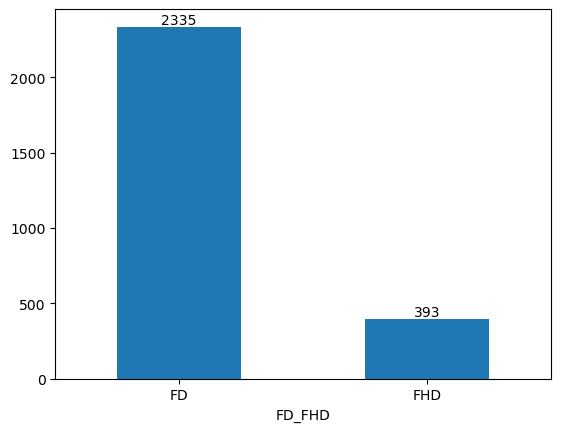

In [182]:
data["FD_FHD"] = data["FD_FHD"].astype("category")

fig, ax = plt.subplots()

data_by_date.groupby("FD_FHD", observed=False).count()["x"].plot.bar(ax = ax, rot=0)

for container in ax.containers:
    ax.bar_label(container)

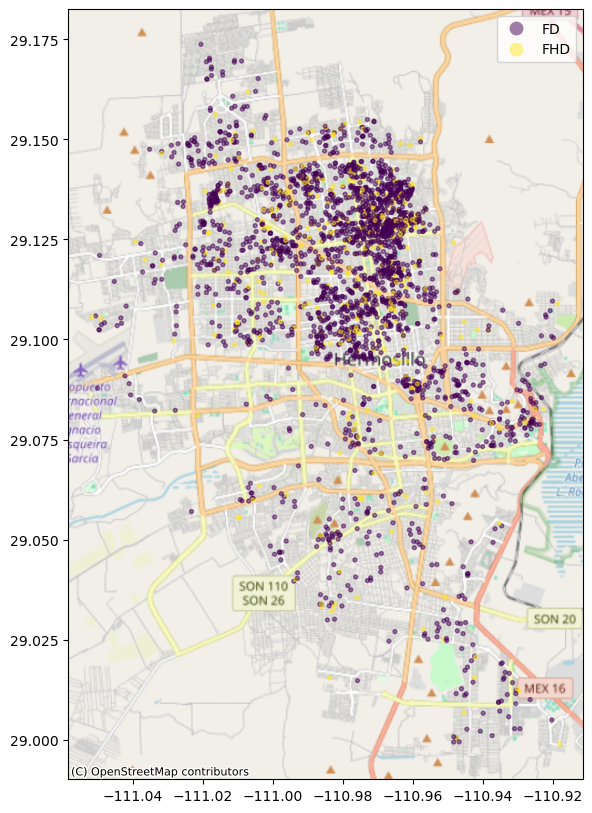

In [183]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(ax=ax, figsize=(8, 8), alpha=0.5, column="FD_FHD", legend=True, cmap='viridis', markersize=8)


cx.add_basemap(ax=ax, crs=gdf.crs, source=cx.providers.OpenStreetMap.Mapnik)

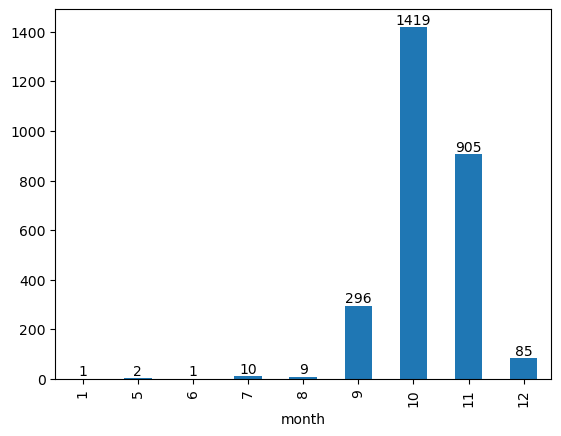

In [184]:
fig, ax = plt.subplots()

data_by_date.groupby("month")["FD_FHD"].agg("count").plot.bar()

for container in ax.containers:
    ax.bar_label(container)

In [185]:
data_by_date.sort_index()

,OBJECTID,Join_Count,TARGET_FID,ID_HILLO,ID_SON,ANYO,FOLIO,SEXO,EDAD,D_H_,...,x,y,Unnamed: 69,day,week,month,year,dayofyear,FD,FHD
I_CUADRO,,,,,,,,,,,,,,,,,,,,,
2010-01-30,1,1,217,231,6261,0,61,hombre,35,PRIVADO,...,-110.958961,29.129075,NaN,30,4,1,2010,30,1,0
2010-05-06,3,1,219,233,6425,0,296,hombre,14,ISSSTESON,...,-110.965989,29.131731,NaN,6,18,5,2010,126,1,0
2010-05-09,2,1,218,232,6424,0,295,mujer,38,ISSSTESON,...,-110.965989,29.131733,NaN,9,18,5,2010,129,1,0
2010-06-04,4,1,220,234,6497,0,427,mujer,22,ISSSTESON,...,-110.979272,29.124453,NaN,4,22,6,2010,155,0,1
2010-07-04,6,2,222,236,6581,0,546,hombre,12,ISSSTESON,...,-110.963284,29.138764,NaN,4,26,7,2010,185,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-28,2345,2,2562,2688,11089,0,5648,mujer,66,ISSSTESON,...,-110.959993,29.113262,NaN,28,52,12,2010,362,1,0
2010-12-28,2348,1,2565,2691,11093,0,5652,mujer,7,ISSSTESON,...,-110.943367,29.084639,NaN,28,52,12,2010,362,0,1
2010-12-31,2352,1,2569,2695,11113,0,5676,mujer,41,ISSSTESON,...,-110.961561,29.136562,NaN,31,52,12,2010,365,1,0


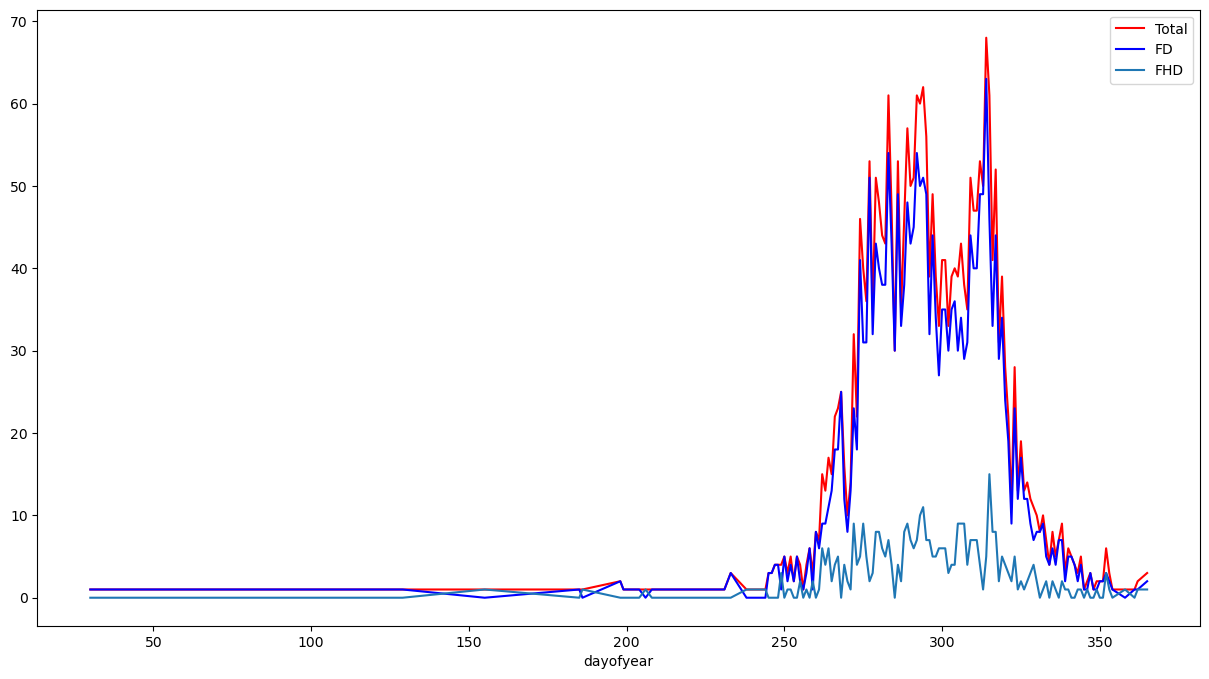

In [186]:
fig, ax = plt.subplots(figsize=(15,8))

data_by_date.groupby("dayofyear")["FD_FHD"].count().plot(ax=ax, color="red", label="Total")
data_by_date.groupby("dayofyear")["FD"].sum().plot(ax=ax, color="blue")
data_by_date.groupby("dayofyear")["FHD"].sum().plot(ax=ax)

plt.legend()
plt.show()


In [187]:
month_data = data_by_date.groupby(["month", "day"])["FD_FHD"].count()
fd_month_data = pd.DataFrame(data_by_date.groupby(["month", "day"])["FD"].sum())
fhd_month_data = pd.DataFrame(data_by_date.groupby(["month", "day"])["FHD"].sum())

month_data = pd.concat([month_data, fd_month_data, fhd_month_data], axis=1)
month_data


FD_FHD  FD  FHD
month day                 
1     30        1   1    0
5     6         1   1    0
      9         1   1    0
6     4         1   0    1
7     4         1   1    0
...           ...  ..  ...
12    20        1   1    0
      24        1   0    1
      27        1   1    0
      28        2   1    1
      31        3   2    1

[135 rows x 3 columns]

In [188]:
month_data.index.get_level_values("month")

Index([ 1,  5,  5,  6,  7,  7,  7,  7,  7,  7,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='month', length=135)

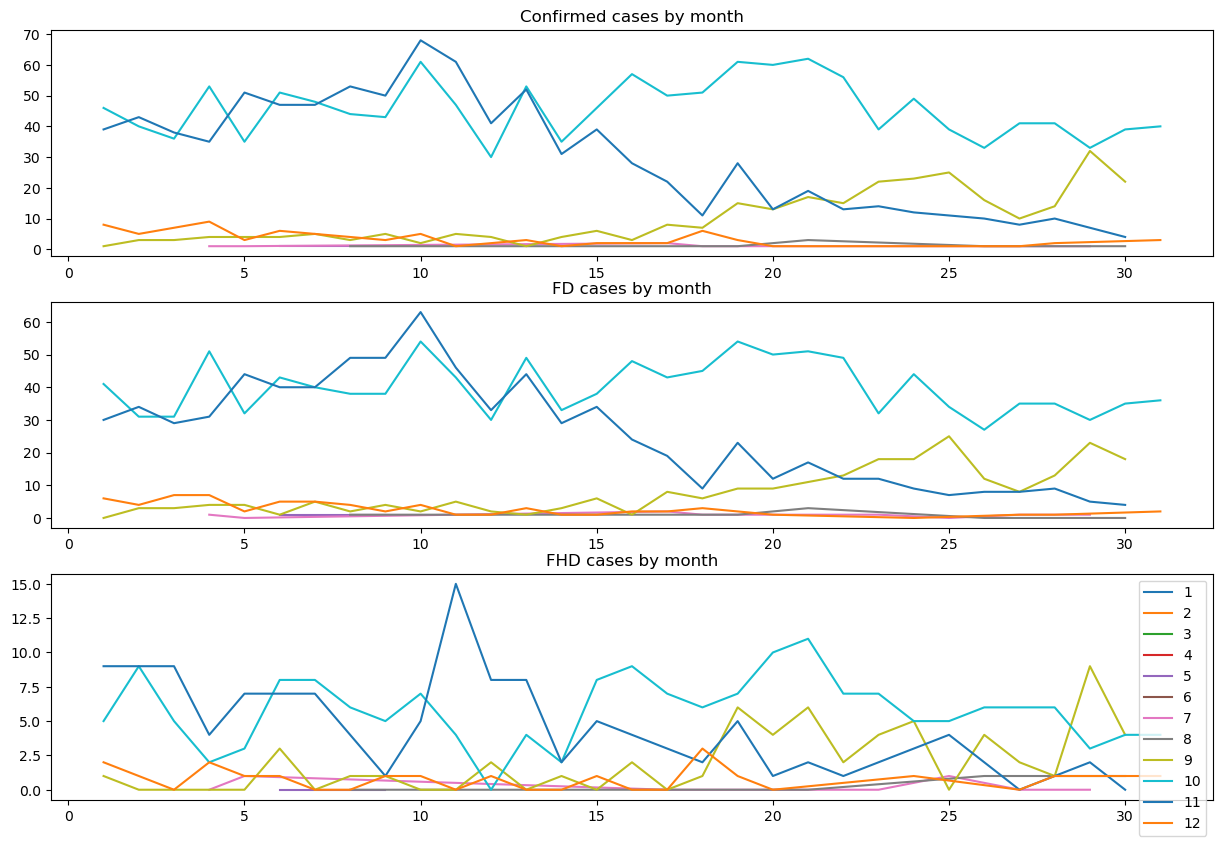

In [189]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))
month_data_dfs = []
month_data_fd_dfs = []
month_data_fhd_dfs = []


for i in range(12):
    month_data_dfs.append(month_data[month_data.index.get_level_values("month") == i+1])
    month_data_fd_dfs.append(month_data[month_data.index.get_level_values("month") == i+1])
    month_data_fhd_dfs.append(month_data[month_data.index.get_level_values("month") == i+1])

for idx, df in enumerate(month_data_dfs):
    ax[0].plot(df.index.get_level_values("day"), df["FD_FHD"], label=idx+1)
    ax[1].plot(df.index.get_level_values("day"), df["FD"], label=idx+1)
    ax[2].plot(df.index.get_level_values("day"), df["FHD"], label=idx+1)

ax[0].title.set_text("Confirmed cases by month")
ax[1].title.set_text("FD cases by month")
ax[2].title.set_text("FHD cases by month")
plt.legend()
plt.show()

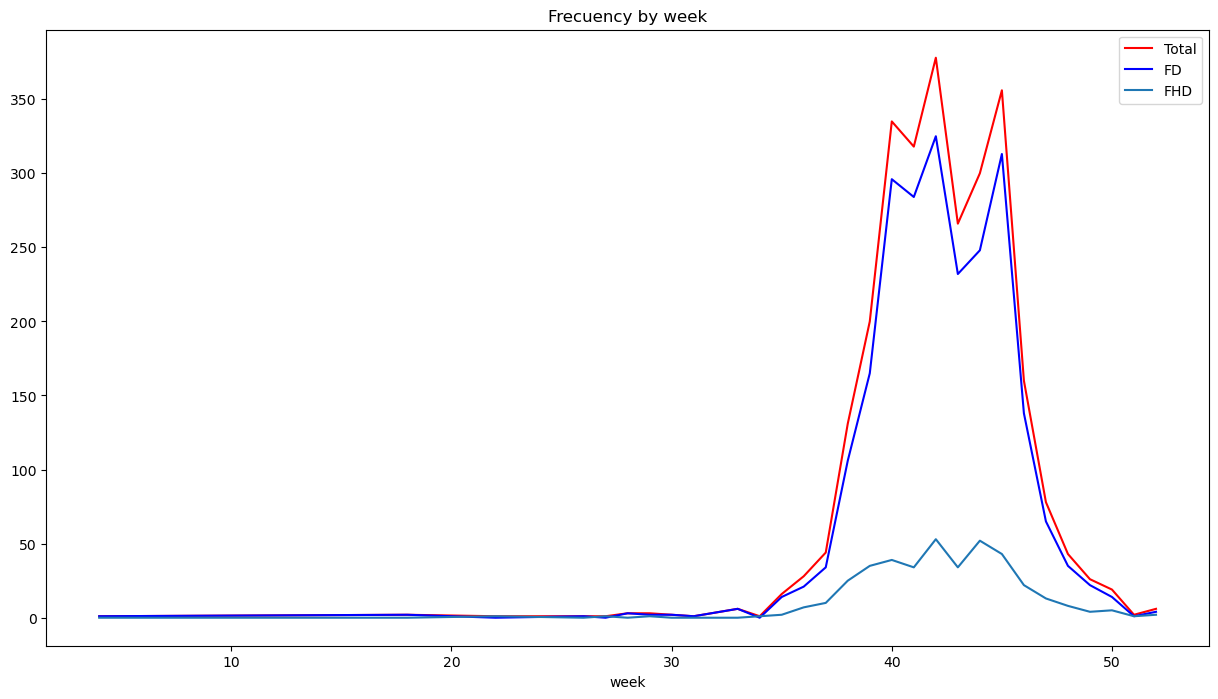

In [190]:
fig, ax = plt.subplots(figsize=(15,8))

data_by_date.groupby("week")["FD_FHD"].count().plot(ax=ax, color="red", label="Total")
data_by_date.groupby("week")["FD"].sum().plot(ax=ax, color="blue")
data_by_date.groupby("week")["FHD"].sum().plot(ax=ax)

plt.title("Frecuency by week")
plt.legend()
plt.show()
